# ADAPTATION OPTIONS APPRAISAL IN SAN SALVADOR

Demographic and economic growth as well as climate change will perturb the risk estimate obtained in [San Salvador Risk](San_Salvador_Risk.ipynb) over the following years. In this section we will consider a plausible future scenario and see how it will affect the region of study. Moreover, we will define household adaptation measures and estimate their cost-benefit relation. 

Further to that, we will explore the effect of risk transfer (also termed insurance) and its interplay with adptation measures. This allows to illustrate the potential of **risk transfer to incentivize adaptation** by _complementing_ a basked of adaptation measures.

## ENTITY IN 2015

A climada entity contains the socio-economic parameters for a fixed year. These are: exposures, impact functions, adaptation measures and discount rates for the following years. `FL_entity_Acelhuate_houses.xlsx` contains the entity of 2015:

2019-10-25 16:24:20,978 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf
2019-10-25 16:24:26,701 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2019-10-25 16:24:26,702 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-10-25 16:24:26,702 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2019-10-25 16:24:26,703 - climada.entity.exposures.base - INFO - centr_ not set.
2019-10-25 16:24:26,703 - climada.entity.exposures.base - INFO - category_id not set.
2019-10-25 16:24:26,704 - climada.entity.exposures.base - INFO - region_id not set.
2019-10-25 16:24:26,705 - climada.entity.exposures.base - INFO - geometry not set.
Total value in 2015: 1.836e+08
2019-10-25 16:24:26,707 - climada.util.coordinates - INFO - Setting geometry points.
2019-10-25 16:24:27,388 - climada.entity.exposures.base

/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2019-10-25 16:24:29,072 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


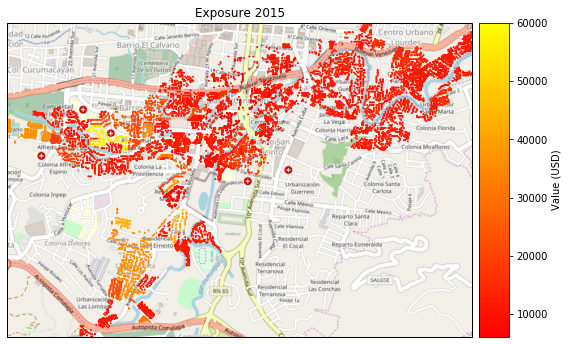

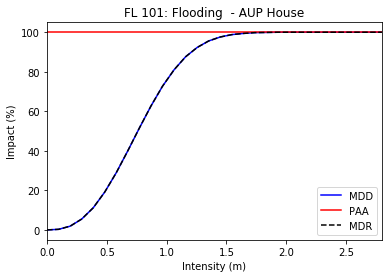

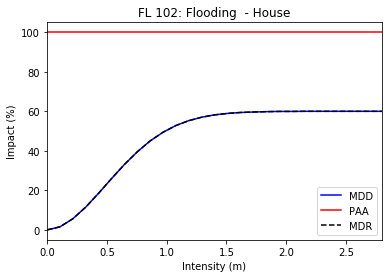

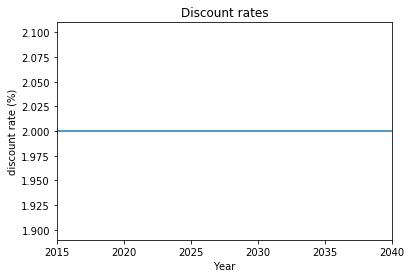

In [1]:
%matplotlib inline
import contextily as ctx
from climada.entity import Entity

ent_2015 = Entity()
ent_2015.read_excel('FL_entity_Acelhuate_houses.xlsx')
ent_2015.exposures.ref_year = 2015 # fix reference year
ent_2015.check()

# Exposures: the ones we used in San Salvador Risk script
print('Total value in 2015: {:.3e}'.format(ent_2015.exposures.value.sum()))
ax = ent_2015.exposures.plot_basemap(s=1, zoom=15, url=ctx.sources.OSM_A, vmax=60000, cmap='autumn')
ax.set_title('Exposure 2015')

# Impact Functions: the ones we used in San Salvador Risk script
ent_2015.impact_funcs.get_func('FL', 101).plot()
ent_2015.impact_funcs.get_func('FL', 102).plot()

# Discount rate: 2% yearly discount year until 2040
ent_2015.disc_rates.plot()

# Adaptation measures: we'll look at them later in this script

## ENTITY IN 2040: MODERATE ECONOMIC GROWTH

In 2014 the economic activity had increased 2% in the metropolitan area of San Salvador. The sectors that grew faster were housing and service (4%), insurance and banking (3.4%), communal services (3.2%) and the hotel and restaurant industry (3.2%). We will fix a conservative discount rate of 2% in this analysis. The construction type will remain the same, meaning that the impact functions don't change.

2019-10-25 16:24:30,486 - climada.entity.exposures.base - INFO - centr_ not set.
2019-10-25 16:24:30,487 - climada.entity.exposures.base - INFO - category_id not set.
2019-10-25 16:24:30,487 - climada.entity.exposures.base - INFO - region_id not set.
Total value in 2040: 3.012e+08
2019-10-25 16:24:30,800 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.
2019-10-25 16:24:32,426 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


Text(0.5, 1, 'Exposure 2040')

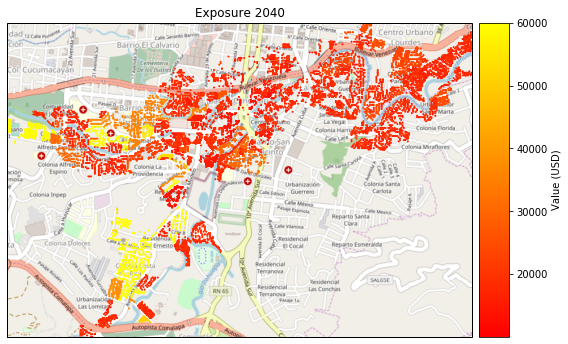

In [2]:
import copy

# same entity as in 2015
ent_2040 = copy.deepcopy(ent_2015)

# Exposures: yearl economic growth of 2% in exposures
ent_2040.exposures.ref_year = 2040
growth = 0.02
ent_2040.exposures['value'] = ent_2040.exposures.value.values*(1 + growth)**(ent_2040.exposures.ref_year - ent_2015.exposures.ref_year)
ent_2040.check() # check values are well set and assignes default values

print('Total value in 2040: {:.3e}'.format(ent_2040.exposures.value.sum()))
ax = ent_2040.exposures.plot_basemap(s=1, zoom=15, url=ctx.sources.OSM_A, vmax=60000, cmap='autumn')
ax.set_title('Exposure 2040')

## HAZARD IN 2015

The flood models at 2015 are the same as the ones used in [San Salvador Risk](San_Salvador_Risk.ipynb). These are gathered in climada's Hazard class:

2019-10-25 16:24:33,620 - climada.hazard.base - INFO - Reading Salvador_hazard_FL_2015.mat
2019-10-25 16:24:33,665 - climada.hazard.centroids.centr - INFO - Reading Salvador_hazard_FL_2015.mat


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


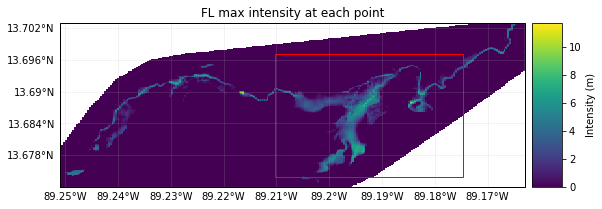

In [3]:
# flood as for 2015
import matplotlib.patches as patches
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2015.mat'

haz_2015 = Hazard('FL')     # set hazard type
haz_2015.read_mat(HAZ_FILE) # load file
ax = haz_2015.plot_intensity(0)  # maximum intensity reached at each point
rect = patches.Rectangle((-89.2102, 13.6738), 0.0355, 0.0233, linewidth=1, edgecolor='r', facecolor='none') # add exposures focus
ax.add_patch(rect)

 The red rectangle highlights the location of the selected exposures.

## HAZARD IN 2040: EXTREME CLIMATE CHANGE

Future projections of climate change reported by 2015 disturb the frequency of precipitation between -16% and 5%. As a consequence, flood could increae 10% in an extreme climate change scenario as represented in the following model:

2019-10-25 16:24:37,626 - climada.hazard.base - INFO - Reading Salvador_hazard_FL_2040_extreme_cc.mat
2019-10-25 16:24:37,675 - climada.hazard.centroids.centr - INFO - Reading Salvador_hazard_FL_2040_extreme_cc.mat


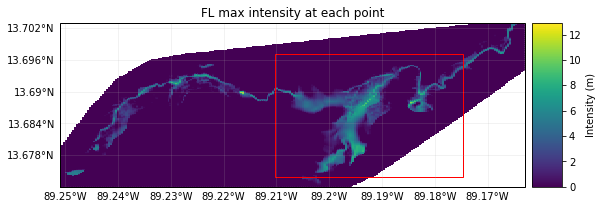

In [4]:
# flood as for 2040 with extreme climate change
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2040_extreme_cc.mat'

haz_2040 = Hazard('FL')     # set hazard type
haz_2040.read_mat(HAZ_FILE) # load file
ax = haz_2040.plot_intensity(0)  # maximum intensity reached at each point
rect = patches.Rectangle((-89.2102, 13.6738), 0.0355, 0.0233, linewidth=1, edgecolor='r', facecolor='none') # add exposures focus
ax.add_patch(rect)

## FUTURE EXPECTED FLOOD DAMAGE

The following graph shows the expected annual impact (see note) that is going to be generated by Acelhuate's floodings in the region of study of San Salvador.

In 2015 the expected annual impact is 3.56 millions USD. In 2040 socio-economic development will increase the risk by 2.28 millions USD and climate change by 1.59 millions, obtaining an expected annual impact of 7.43 millions USD (more than doubled with respect to 2015).

_Please note that the expected annual impact (EAI) represents the expected longt-term mean impact per year, averaged over many years. This is one of many risk measures implemented in CLIMADA, see [Aznar-Siguan and Bresch, 2019](https://doi.org/10.5194/gmd-12-3085-2019) for details. Impact is often named damage (especially in the adaptation context) and sometimes even loss (e.g. in the insurance context). Please note further that the graph shows rounded numbers._

2019-10-25 16:24:41,989 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2019-10-25 16:24:44,064 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:44,076 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2019-10-25 16:24:46,062 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:46,081 - climada.engine.cost_benefit - INFO - Risk at 2015: 3.563e+06
2019-10-25 16:24:46,082 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:46,084 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:46,094 - climada.engine.cost_benefit - INFO - Risk with development at 2040: 5.842e+06
2019-10-25 16:24:46,095 - climada.engine.cost_benefit - INFO - Risk with development and climate change at 2040: 7.429e+06


Text(0.5, 1.0, 'Expected Annual Impact')

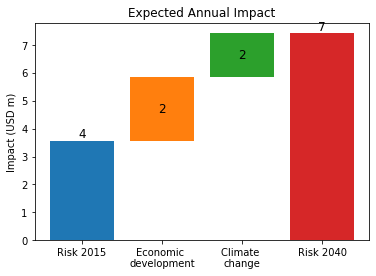

In [5]:
# expected annual impact
from climada.engine import CostBenefit

cb_acel = CostBenefit()
ax = cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040)
ax.set_title('Expected Annual Impact')

If we look at the exceeded impact for a given return period (instead of expected annual impact), the numbers change considerably. The risk metric used in CLIMADA can be changed using its defined risk functions as follows:

Here, we show the impact at return period of one in a hundred years. The "Impact Exceedance at 100 years Return Period" could also be labeled "the 1% probability of having a loss equal or greater that amount each year":

2019-10-25 16:24:46,218 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:46,222 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:46,231 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:46,235 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:46,253 - climada.engine.cost_benefit - INFO - Risk at 2015: 4.912e+07
2019-10-25 16:24:46,254 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:46,256 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:46,265 - climada.engine.cost_benefit - INFO - Risk with development at 2040: 8.059e+07
2019-10-25 16:24:46,266 - climada.engine.cost_benefit - INFO - Risk with development and climate change at 2040: 1.092e+08


Text(0.5, 1.0, 'Impact Exceedance at 100 years Return Period')

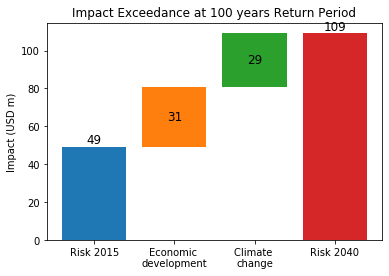

In [6]:
# exceeded impact for 100 years return periods
from climada.engine import risk_rp_100

cb_acel = CostBenefit()
ax = cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040, risk_func=risk_rp_100)
ax.set_title('Impact Exceedance at 100 years Return Period')

## COST AND BENEFIT OF ADAPTATION OPTIONS

Some of the damages could be averted by implementing adaptation measures. We are going to analyse several measures that could be implemented at household level. These tend to be profitable, but of low impact.

The measure `No descargas en Lluvia` defines that every inhabitant of the region avoids discharging the toilet while raining. They should understand that any liquid flowing through the pipes of the houses goes down through the pipes of the city, by ravines and by rivers, sometimes lakes, to the sea. In its path it contaminates and floods, specially during the hours of heavy rain where the streets are inundated. The costs of this measure includes an education program, summing up to a net present value of 41'894 USD. 

Measure cost 4.189e+05 USD
2019-10-25 16:24:46,387 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:46,388 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:46,389 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:46,390 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:46,391 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:46,392 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:46,393 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:46,394 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:46,396 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:46,406 - climada.entity.measures.base - DEBUG - Cutting events whose

/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


Text(0.5, 1, 'Maximumm reduced intensity with measure')

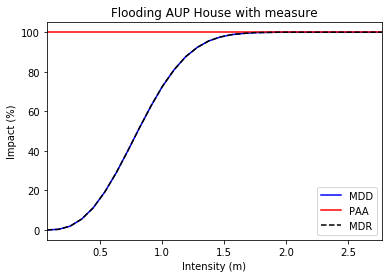

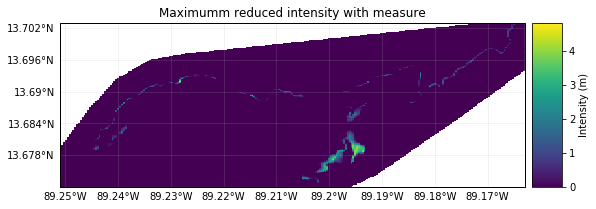

In [7]:
# Measure impact in 2015: No descargas en Lluvia
meas = ent_2015.measures.get_measure('FL', 'No descargas en Lluvia')
print('Measure cost {:.3e} USD'.format(meas.cost))
meas_exp_2015, meas_if_2015, meas_haz_2015 = meas.apply(ent_2015.exposures, ent_2015.impact_funcs, haz_2015)

# exposures stay the same

# impact functions slightly improved:
ax = meas_if_2015.get_func('FL', 101).plot()
ax.set_title('Flooding AUP House with measure')

# flood reduced up to 4.8 meters in worst events:
import numpy as np
haz_diff = copy.deepcopy(haz_2015)
haz_diff.intensity = (haz_2015.intensity - meas_haz_2015.intensity)
ax = haz_diff.plot_intensity(0) # maximum intensity difference at each point
ax.set_title('Maximumm reduced intensity with measure')

We will estimate the cost-benefit ratio of the following household measures. `Benefit` refers to the total averted damage when the measure is applied from 2015 to 2040, whilst `cost` refers to the implementation and maintance costs of the measure until 2040 (and has therefore been discounted to 2015, i.e. we compare net present values, NPVs).

In [8]:
# name of every considered measure
for meas in ent_2040.measures.get_measure('FL'): # measures related to flood (FL)
    print(meas.name)

Sanitarios de descarga Dual
Ahorradores en Agua en casas
No descargas en Lluvia
Reuso de agua de enjuage
Puentes sin basura
Captacion de agua de techos


2019-10-25 16:24:51,543 - climada.engine.cost_benefit - DEBUG - present impact with no measure.
2019-10-25 16:24:51,544 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:51,546 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:51,558 - climada.engine.cost_benefit - DEBUG - present impact of measure Sanitarios de descarga Dual.
2019-10-25 16:24:51,559 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:51,560 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:51,560 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:51,561 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:51,562 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:51,563 - climada.entity.measures.base - DEBUG - Transforming impact func

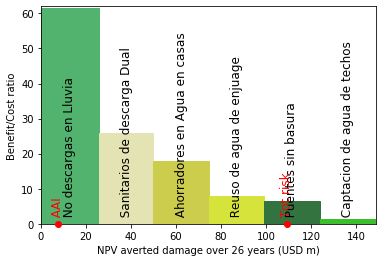

In [9]:
cb_acel = CostBenefit()
cb_acel.calc(haz_2015, ent_2015, haz_2040, ent_2040, save_imp=True) # compute
cb_acel.plot_cost_benefit() # plot benefit/cost ratio per measure


All the options avert about the same quantity of damage each and yield a higher benefit than their implementation costs (benefit/cost ratio is greater than 1 in all the cases). However, the most profitable (`No descargas en Lluvia`) is almost 45 times more cost-effective than the least (`Captacion de agua de techos`).

`Tot risk` labels the total climate risk (net present value of total climate risk over the period of 26 years) and `AAI` stands for the annual aggregate impact, i.e. the long-term average impact (or damage) per year. Tot risk is not equal to 26* AAI, since there are years with no damage and years with (much) higher than average damage, all taken account of in the probabilistic way total climate risk is calculated. See [Aznar-Siguan and Bresch, 2019](https://doi.org/10.5194/gmd-12-3085-2019) for details. 

## RISK TRANSFER
Instead of applying all measures (as shown above), one might only apply a subset of measures. Reasons could be that only select measures are broadly accepted or that a limited budget does only allow to finance the implementation of these select measures. 

_See [Souvignet et al, 2017](https://www.kfw-entwicklungsbank.de/PDF/Download-Center/Materialien/2016_No6_Guidebook_Economics-of-Climate-Adaptation_EN.pdf) for a broader description of further dimensions that need to be considered when it comes to a practical selection of measures._

Here, we select two measures for illustration purposes (`No descargas en Lluvia` and `Ahorradores en Agua en casas`) and combine them into one measure, named `Domestico`. Please note that while the cost of the two measures is the sum of the costs of each measure, the combined benefit is smaller than the stand-alone benefit of each measure. This is due to the fact that when combining measures, CLIMADA avoids double-counting of the first kind, i.e. if the first measure reduces the impact of a given flood event at a given place to zero, the second measure does not further reduce damages any more. _Please note that double counting of the second kind (e.g. a real interplay of measures) is for obvious reasons not captured._

In [10]:
import matplotlib.colors as colors
cb_comb = cb_acel.combine_measures(['No descargas en Lluvia', 'Ahorradores en Agua en casas'],
                                    'Domestico', colors.to_rgb('lightcoral'), ent_2015.disc_rates)


Measure      Cost (USD m)    Benefit (USD m)    Benefit/Cost
---------  --------------  -----------------  --------------
Domestico         1.81542            27.1143         14.9356

--------------------  ---------  -------
Total climate risk:   109.277    (USD m)
Average annual risk:    7.42926  (USD m)
Residual risk:         82.1622   (USD m)
--------------------  ---------  -------
Net Present Values


Total climate and average annual risk before measures do not change for obvious reasons (they are calculated _before_ the application of measures). The residual damage is now greater than zero, since the two measures do not avert all damage. In the case of applying all measures, we saw that they might reduce residual risk to zero. But as stated above, since the combined effect of measures is less or equal to the sum of the single benefit of each measure, a proxy for the combined effect can only be obtained by calling the method `combine_measures`. 

As a next step, we can now introduce risk transfer (or insurance) to absorb further damage after application of the combined `Domestico` measures. One simply needs to state the _attachement_ and _cover_ of the insurance layer. The attachement point is the amount of damage below the layer, i.e. damages that will not trigger an insurance payout. The attachement point is usually greater than zero, both to avoid handling spurious claims (triggering a lot of handling costs) as well as to avoid moral hazard, since with a non-zero attachement point, the insured has an interest to actively manage risk, such as not to pay damages up to the attachement point too often. In a similar fashion, the cover defines the maximally granted payout and limits the liability of the insurer. Again, this creates an incentive for the insured to properly manage risks such as not to exceed the cover - or only very very infrequently. Finally, since insurance is a service and comes at a cost, the cost factor defines a multiplier applied to the raw cost of the expected damage within the insurance layer, to account for distribution, handling and capital cost of insurance. We set this here to a proxy value of 1.5. Please note that real values will differ substantially, in tendence lowering this factor the larger the scheme becomes.

We define an insurance cover and apply it _after_ the effect of measures, i.e. insurance to _complement_ selected measures.

In [11]:
cb_comb.apply_risk_transfer('Domestico', attachment=1000, cover=22000000, 
                            disc_rates=ent_2015.disc_rates, cost_fix=0, cost_factor=1.5)


Measure                      Cost (USD m)    Benefit (USD m)    Benefit/Cost
-------------------------  --------------  -----------------  --------------
Domestico                         1.81542            27.1143       14.9356
risk transfer (Domestico)        71.3035             47.5357        0.666667

--------------------  ---------  -------
Total climate risk:   109.277    (USD m)
Average annual risk:    7.42926  (USD m)
Residual risk:         34.6265   (USD m)
--------------------  ---------  -------

Risk transfer           Expected damage in     Price (USD m)
                    insurance layer (USD m)
---------------  --------------------------  ---------------
without measure                     73.0946         109.642
with measure                        47.5357          71.3035

Net Present Values


As above, total climate and average annual risk before measures do not change for obvious reasons. The residual risk is still greater than zero, since the two measures plus insurance do not avert all damage. But the residual risk is smaller than without insurance, which absorbs a substantial part of it. 

The effect of risk transfer is shown both without the application of measures (more expensive) as well as after application of measures (with measure `Domestico`). **If insurance complements (a set of) measures, its price is substantially reduced.**

_Please note that amounts shown are net present values (NPV), not annual payments. Since we look here into a time period of 26 years, annual numbers would be order of 1/26 of the numbers stated above._

--> You might _**experiment**_ with the parameter _cover=..._ to see the effect of more insurance cover being granted.

Finally, we can again render the effect as an adaptation cost curve:

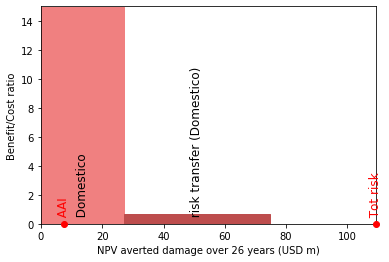

In [12]:
cb_comb.plot_cost_benefit()

## WATERFALL PLOT
We can also represent the total accumulated impact from 2015 to 2040, and the total amount that can be averted using all the adaptation measures defined. From 2015 until 2040, if the exposure and the hazard remain the same as today, and considering the dicount rates of `ent_2015.disc_rates`, a total amount of 73 millions USD would be damaged. If we consider the moderate socio-economic growth and extreme climate change described previously, there would be an expected total loss of 111 millions USD. 22 million USD of this increase would be due to economic growth and 15 million USD due to climate change.

2019-10-25 16:24:52,506 - climada.engine.cost_benefit - INFO - Current total risk at 2040: 7.312e+07
2019-10-25 16:24:52,507 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:52,512 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:52,523 - climada.engine.cost_benefit - INFO - Total risk with development at 2040: 9.444e+07
2019-10-25 16:24:52,525 - climada.engine.cost_benefit - INFO - Total risk with development and climate change at 2040: 1.093e+08
2019-10-25 16:24:52,550 - climada.engine.cost_benefit - INFO - Combining all measures ...

Measure        Cost (USD m)    Benefit (USD m)    Benefit/Cost
-----------  --------------  -----------------  --------------
combine all         27.6951            31.0276         1.12033

--------------------  ---------  -------
Total climate risk:   109.277    (USD m)
Average annual risk:    7.42926  (USD m)
Residual risk:         78.2489   (USD m)

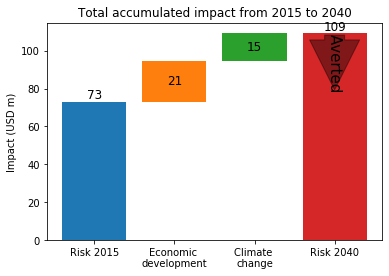

In [13]:
cb_acel.plot_waterfall_accumulated(haz_2015, ent_2015, ent_2040)

The accumulated damages are obtained by adding the expected annual damages (or the selected risk function) from 2015 to 2040 (included). In the case of climate change and economic development, the expected annual damage by 2040 has increased with respect to the one of 2015. Assuming that the growth in annual expected damage happens linearly from 2015 to 2040, we obtain a total damage of 111 m USD by 2040. However, if the growth follows a sublinear or superlinear curve, the total amount of loss changes (take into account that the discounting is computed as well).

Importing Jupyter notebook from functions_ss.ipynb


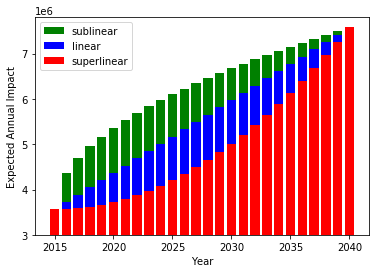

In [14]:
# show difference between sublinear, linear and superlinear expected annual damage growth
import nbimporter
import functions_ss
functions_ss.non_linear_growth(cb_acel)

2019-10-25 16:24:53,287 - climada.engine.cost_benefit - DEBUG - present impact with no measure.
2019-10-25 16:24:53,288 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-10-25 16:24:53,291 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-10-25 16:24:53,304 - climada.engine.cost_benefit - DEBUG - present impact of measure Sanitarios de descarga Dual.
2019-10-25 16:24:53,304 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:53,305 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:53,306 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:53,307 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:53,308 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-10-25 16:24:53,310 - climada.entity.measures.base - DEBUG - Transforming impact func

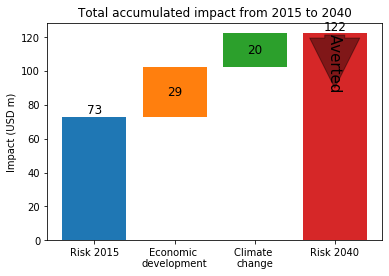

In [15]:
# change growth
growth_fact = 0.5 # < 1: sublinear, >1: superlinear
cb_acel_sub = CostBenefit()
cb_acel_sub.calc(haz_2015, ent_2015, haz_2040, ent_2040, imp_time_depen=growth_fact, save_imp=True)
cb_acel_sub.plot_waterfall_accumulated(haz_2015, ent_2015, ent_2040, imp_time_depen=growth_fact)

Whilst the implementation of all the measures could avert approximately 30 m USD over the next 26 years, this doesn't mean that they could avert an extreme event generating 30 m USD damage which could occur in that period. Extreme events with high return periods can overwhelm measures which are effective on an average damage basis.

Following the same color code as in the cost-benefit figure above, the following figure shows the averted damage per return period of floods (for the year 2040, i.e. inclucing economic growth and climate change). While domestic measures are very effective for frequent flood events, they cover only a tiny fraction of infrequent events:

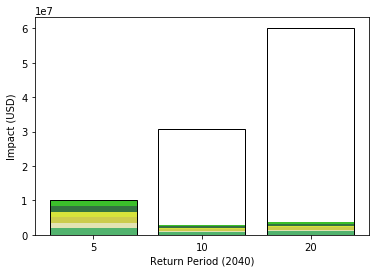

In [16]:
cb_acel.plot_event_view([5, 10, 20])

But if we complement adaptation measures with risk transfer (as shown above), a substantially larger fraction of risk can be dealt with also for higher return periods. Risk transfer is particularly suitable to handle risks of low frequency, high severity events. Light red the `Domestico` measures, darker red the insurance cover.

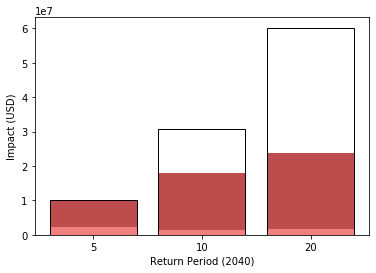

In [17]:
cb_comb.plot_event_view([5, 10, 20])